# Week 9: Hypothesis Testing

## March 12, 2025

**Michael Jongho Moon**

## Recall: U.S. COVID statistics

In homework 7, we looked at the relationship between population size and COVID-10 infection rates.

In [1]:
import pandas as pd
covid_raw_data = pd.read_csv("covid_raw.csv")
covid_final_data = (
    covid_raw_data[["State", "Total_cases", "pop"]]
    .rename(columns = {"Total_cases": "Total Cases", "pop": "Population"})
    .convert_dtypes()
)
covid_final_data["Case Rate (%)"] = covid_final_data["Total Cases"] / covid_final_data["Population"] * 100
# with .loc[] (.iloc[]) you can access rows and columns at the same time
threshold = 7500000
covid_final_data.loc[covid_final_data["Population"] > threshold, "State Size"] = "Large"
covid_final_data.loc[covid_final_data["Population"] <= threshold, "State Size"] = "Small"
print("Large state mean: {} vs. Small state mean: {}".format(
    covid_final_data.loc[
        covid_final_data["State Size"] == "Large", "Case Rate (%)"
        ].mean().round(3),
    covid_final_data.loc[
        covid_final_data["State Size"] == "Small", "Case Rate (%)"
        ].mean().round(3)))

Large state mean: 12.094 vs. Small state mean: 13.838


/var/folders/0j/ybsv4ncn5w50v40vdh5jjlww0000gn/T/ipykernel_30080/2781715131.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


> With `.loc[]` (and `.iloc[]`), you can access rows and columns at the same time. See [here](https://pandas.pydata.org/pandas-docs/version/1.0/getting_started/intro_tutorials/03_subset_data.html) for more examples.

_Does this imply smaller states face a higher COVID-19 infection rate on average?_

**OR**

_Did we observe the difference only by chance?_

## How we view data

_The data values we see (observe) are one instance of sampling from the population._

### Population vs. sample

**Population**: the group that we wish to study 
> e.g., _all_ members of the U.S. population throughout the period of the COVID-19 pandemic.

**Sample**: a sub-group from the population that we can actually access/study, and use this to make *inference* about the population 
> e.g., those whose COVID-19 infection was recorded in the public health system during the report period.

<img src="sample+pop.png" width="800">


### Parameter vs. mean

**Parameter**: a metric from the population  

**Statistic**: a metric from the sample


<img src="stats.png" width="800">


More often than not, we are interested in parameters that are unknown to us.

- In a population of voters, what percent will vote for Candidate A?

- In a population of TikTok users, what is the largest number of followers for a user?

- In a population of Air Canada flights, what is the median departure delay?


## Does Neanderthal genes increase or decrease the chance of experiencing a servere COVID-19 case?

![](neanderthar-gene-does-all.png)

## We use statistics to make our best guess about parameters

**Parameter**: usually we use greek letters ($\mu$) to denote this

**Statistic**: usually we use roman alphabet ($\bar{y}$) to denote this.



Note:
+ $\mu$ often represents the population mean
+ $\bar{y}$ often represents the sample mean
+ There are other types of parameters and statistics that use different notations.


## How we make decisions based on data

### Hypothesis Testing

+ Hypothesis testing allows us to test if a hypothesis is true or not.
+ We usually build a hypothesis about the population using parameter(s)
+ Collect some data and see if the data is in support of the hypothesis or not.

Let's explore this, by revisiting an event from ~~my~~ childhood.

[Smarties](https://www.madewithnestle.ca/smarties) had an [ad campaign](https://www.youtube.com/watch?v=kYbKvBBvAG4) in the 1990s asking "When you eating your Smarties do you eat the red ones last?".

![smarties2.png](smarties.png)

So shortly after I went to go eat a pack of Smarties, planning on saving the red ones for the end, I was disappointed to find no red ones in my box of Smarties.

But I had to eat a red one last. I went out and bought another 20 boxes of Smarties.

Now, Smarties has **8** colours in Canada (red, blue, purple, brown, pink, green, orange, and yellow) and I was buying packs with **48**. Smarties claimed to have an equal number of each colour. So, they they claim that the expected number of red Smarties of all packs is $\mu=\cfrac{48}{8}=6$. 

+ I counted the number of red Smarties in each box. 
+ The average number of red Smarties among all 20 boxes I bought was $\bar{y}$ = 5.
+ The is the **sample mean**.

The 5 is different from $\mu=6$, the **population mean** claimed by Nestle. I should be rightfully upset at Nestle, right? Or, could it be that I'm just an unlucky person?

We want to see how likely our 5 is, if we had kept collecting samples of size 20 under the assumption of Nestle's claim is true.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
red_smarties = np.array([])

In [3]:
# custom function to create the plot
# for demonstration purpose only
def dot_plot(data, binwidth, bindots, **kwargs):
    bins = np.arange(
        np.floor(min(data) * binwidth) / binwidth, 
        np.ceil(max(data) * binwidth) / binwidth + binwidth, 
        binwidth)
    counts, bins = np.histogram(data, bins=bins)
    x = []
    y = []
    fig, ax = plt.subplots()

    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_xticks(bins)
    ax.set_ylim(-(max(counts) / bindots) / 50, max(counts) / bindots)
    
    for i, b in  enumerate(bins[:-1]):
        ax.axvspan(b, bins[i+1], color=["white", "lightgrey"][i % 2])
        for c in range(0, counts[i]):
            x.append(b + (c % bindots) * binwidth * .8 / bindots + binwidth * .1)
            y.append(np.floor(c / bindots))

    ax.scatter(x, y, **kwargs)


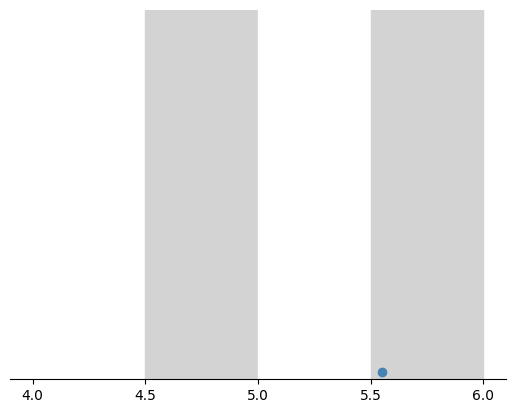

In [4]:
# the code simulates the average of red Smarties from 20 Smarties packages if Nestle was truthful
# don't worry about understanding the code for now
red_smarties = np.append(red_smarties, np.random.binomial(48, 1/8, 20).mean())
# call the custom function
dot_plot(red_smarties, .5, 5, color="steelblue")

Assuming that Smarties claim is true (i.e., $\mu=6$), maybe 100 repeats of the experiment would look like this:

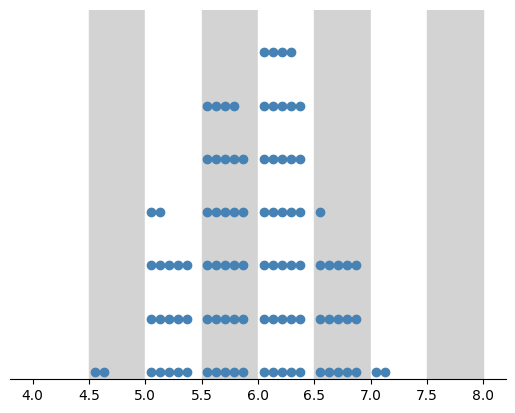

In [5]:
np.random.seed(634)
red_smarties = np.array([])
for _ in range(100): # repeeat 100 times
    red_smarties = np.append(red_smarties, np.random.binomial(48, 1/8, 20).mean())
dot_plot(red_smarties, .5, 5, color="steelblue")

The *hypothesis* is that $\mu=6$.

Now, here is where our data ($\bar{y}=5$) falls, when we assume that Smarties claim is true (i.e., $\mu=6$).

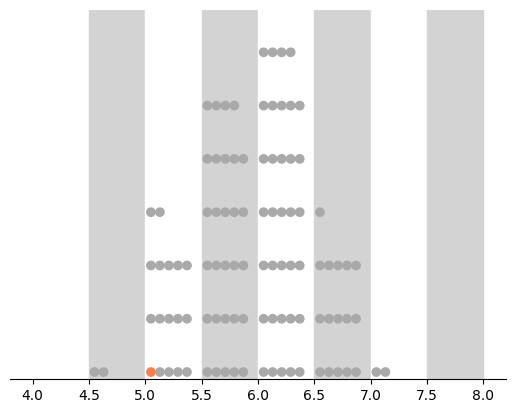

In [6]:
observed = ["coral" if x  == 5 else "#A9A9A9" for x in np.sort(red_smarties)]
dot_plot(red_smarties, .5, 5, color=observed)

### Null & alternative hypotheses, test statistic, and p-value

+ Our value of 5 is known as the **test statistic** --- a _statsistic_ used to perfomr our hypothesis _test_.


+  The hypothesis under which we compute the test statistic is called the **null hypothesis**. The "opposite" claim or the complement hypothesis is called the **alternative hypothesis**.

+ How probable was our data/test statistic, if the null hypothesis is actually true? The answer to this is the **p-value**.

+ Specifically, the **p-value** is the probability of observing any data points _more or as extreme_ as our test statistic (given that the null hypothesis was true).

  + We typically test with _"more or as extreme"_ in both directions using absolute difference from the null hypothesis.

So our **p-value is $0.05$**. Since there are 3 instances of $\bar{y}$ equal to or less than 5 out of 100.

p-value: 0.05


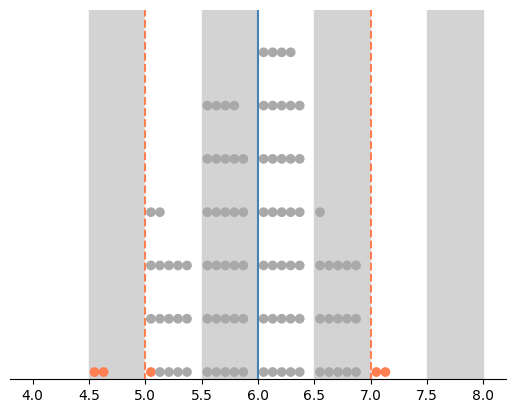

In [7]:
extremes = ["coral" if abs(x - 6)  >= 1 else "#A9A9A9" for x in np.sort(red_smarties)]
dot_plot(red_smarties, .5, 5, color=extremes)
plt.plot([6, 6], [-1, 10], markersize=15, color="steelblue")
plt.plot([5, 5], [-1, 10], "--", markersize=15, color="coral")
plt.plot([7, 7], [-1, 10], "--", markersize=15, color="coral")
print("p-value: {}".format((abs(red_smarties - 6) >= 1).mean().round(4)))

## How do we interpret a p-value?

+ The smaller your p-value is, the more "convinced" we are that the **null hypothesis is false**.

+ Typically...

p-value | Conclusion
:--:|:------------
$>0.1$ | Weak evidence against the null hypothsis.
Between 0.05 and 0.1 | Moderate evidence against the null hypothesis.
Between 0.01 and 0.05 | Strong evidence against the null hypothesis.
$<0.01$ | Very strong evidence against the null hypothesis.

+ A large p-value doesn't provide evidence for the null hypothesis. By construction, a hypothesis test starts under the assumption of the null hypothesis and we either find evidence _against_ it or don't.

In this case 0.05 is quite small, so we would say there is strong evidence against the hypothesis that there were 6 red smarties on average in all boxes of smarties.

## Goals of Data Science

- Deeper understanding of the world.

- Make the world a better place to live.

- For example, help expose injustice.

- The skills you are learning help empower you to do this.

## Jury Selection

- U.S. Constitution grants equal protection under the law.

- All defendants have the right to due process.

- Robert Swain, a black man, was convicted in Talladega County, AL.

- He appealed to the U.S. Supreme Court.

- Main reason: Unfair jury selection in the County’s trials.

- At the time of the trial, only men aged 21 or more were eligible to serve on juries in Talladega County. In that population, 26% of the men were black. 

- But only eight men among the panel of 100 men (that is, 8%) were black.

- The U.S. Supreme Court reviewed the appeal and concluded, “the overall percentage disparity has been small.” But was this assertion reasonable? 

- If jury panelists were selected at random from the county’s eligible population, there would be some chance variation. We wouldn’t get exactly 26 black panelists on every 100-person panel. But would we expect as few as eight?

## A model of random selection

- A model of the data is that the panel was selected at random and ended up with a small number of black panelists just due to chance.

- Since the panel was supposed to resemble the population of all eligible jurors, the model of random selection is important to assess. Let’s see if it stands up to scrutiny.

- The `numpy.random` function `multinomial(n, pvals, size)` can be used to simulate sample proportions or counts with two or more categories.

## Example 1: Rolling a six-sided die 20 times

In [8]:
import numpy as np

sample_size = 20
num_simulations = 1
true_probabilities = [1 / 6] * 6

counts = np.random.multinomial(n=sample_size, 
                               pvals=true_probabilities, 
                               size=num_simulations)

proportions = counts / sample_size

print("True probabilities: \n", true_probabilities)
print("Sample counts: \n", counts) 
print("Sample proportions: \n", proportions)

True probabilities: 
 [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
Sample counts: 
 [[2 2 8 2 2 4]]
Sample proportions: 
 [[0.1 0.1 0.4 0.1 0.1 0.2]]


## Example 2: Rolling a loaded six-side 100 times more likely to land on 6 - repeated 3 times

In [9]:
sample_size = 100
num_simulations = 3
true_probabilities = [1 / 7] * 5 + [2 / 7]

counts = np.random.multinomial(sample_size, 
                               true_probabilities, 
                               num_simulations)

proportions = counts / sample_size

print("True probabilities: \n", true_probabilities)
print("Sample counts:\n", counts) 
print("Sample proportions: \n", proportions)

True probabilities: 
 [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.2857142857142857]
Sample counts:
 [[16 15 13  7 12 37]
 [ 9 16 11 17 14 33]
 [17 14 12 17 18 22]]
Sample proportions: 
 [[0.16 0.15 0.13 0.07 0.12 0.37]
 [0.09 0.16 0.11 0.17 0.14 0.33]
 [0.17 0.14 0.12 0.17 0.18 0.22]]


- Let's use this to simulate the jury selection process.

- The size of the jury panel is 100, so `sample_size` is 100. 

- The distribution from which we will draw the sample is the distribution in the population of eligible jurors: 26% of them were Black, so 100% - 26% = 74% are white (very simplistic assumption, but let's go with it for now). 

- This mean `true_proportions` is `[0.26, 0.74]`.

- One simulation is below.

In [10]:
import pandas as pd

sample_size = 100
true_probabilities = [0.26, 0.74]
num_simulations = 1

counts = np.random.multinomial(sample_size, 
                               true_probabilities, 
                               num_simulations)

proportions = counts / sample_size

sim_counts = pd.DataFrame(proportions, columns=["Black", "White"])

sim_counts


,Black,White
0,0.26,0.74


In [11]:
# extract the element in the first row, first column
sim_counts["Black"][0] # give me the column "Black" then extract the "first" row
sim_counts.iloc[0, 0] # (row number, column number)
sim_counts.loc[0, "Black"]  # (row index, column name)

0.26

## Simulate one value

In [12]:
def simulate_one_count():
   """Simulate a panel of 100 randomly selected from a population of 26% black and 74% white males.
    
   Returns:
      integer : the simulated number of black males selected for the panel of 100.
   """
   sample_size = 100
   true_probabilities = [0.26, 0.74]
   num_simulations = 1
   counts = np.random.multinomial(sample_size, 
                                  true_probabilities, 
                                  num_simulations)
    
   # sim_counts = pd.DataFrame(counts, columns=["Black", "White"])
   # return sim_counts.iloc[0, 0]
   return counts[0, 0]

In [13]:
simulate_one_count()

23

## Simulate multiple values

-  Our analysis is focused on the variability in the counts. 

- Let’s generate 10,000 simulated values of the count and see how they vary.

- We will do this by using a for loop and collecting all the simulated counts in a list.

In [14]:
sim_counts = []
for _ in np.arange(10000): # repeat 10000 times
    sim_counts.append(simulate_one_count())


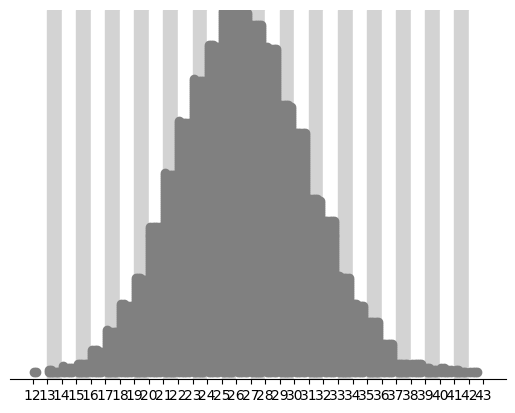

In [15]:
# can you see the 10,000 dots?
dot_plot(sim_counts, 1, 5, color="grey")

## Histogram

+  A histogram plots bars representing the (relative) frequency of data observed in each _bin_.
+  `matplotlib.pyplot` library provides functions to visualize data and is the default backend used for `pandas` plotting functions.
+  We can specify the bins with `np.arange(start=5.5, stop=47, step=1)` which creates a `numpy` array (like a `Serries` but for numpy) with numbers starting at 5.5 and increasing by 1 until reaching 47.

In [16]:
np.arange(start=5.5, stop=47, step=1)

array([ 5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5,
       16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5,
       27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5,
       38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5])

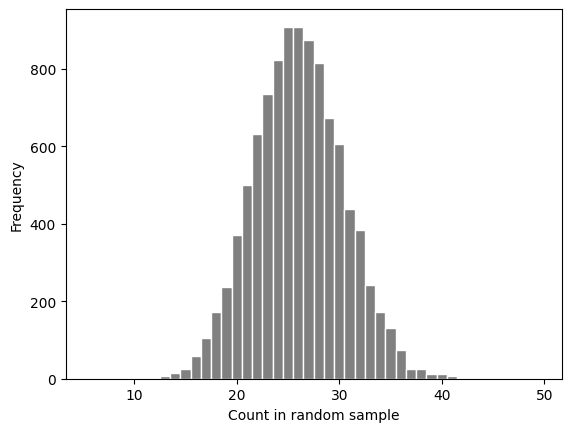

In [17]:
import matplotlib.pyplot as plt
bins=np.arange(5.5, 50, 1)  # numpy array
plt.hist(sim_counts,        # data to plot in the histogram
         bins=bins,         # specify the bounds of the bins
         edgecolor="white", # you can specify other aesthetics
         color="grey")
plt.xlabel("Count in random sample")  # update the x-axis label of the current plot
plt.ylabel("Frequency");              # update the y-axis label of the current plot

+ Setting `density=True` in the `plt.hist()` function creates a "density" histogram.
+ The bar heights are adjusted to relative frequencies such that the total area of the bars is 1.
+ When the width of the bins are 1, the heights represent the proportions.

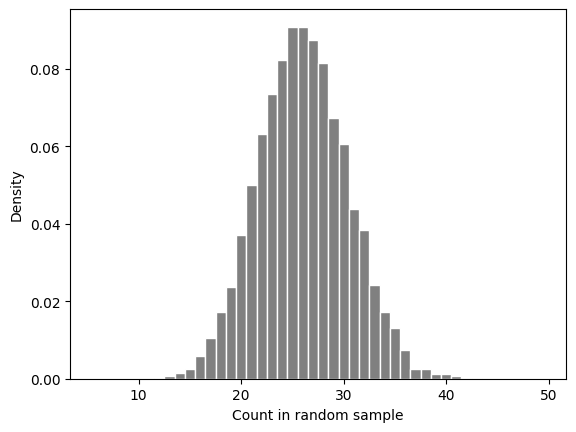

In [18]:
plt.hist(sim_counts, 
         bins=bins, 
         edgecolor="white", 
         color="grey", 
         density=True);
plt.xlabel("Count in random sample")
plt.ylabel("Density");

## How likely was Mr. Swain's experience?

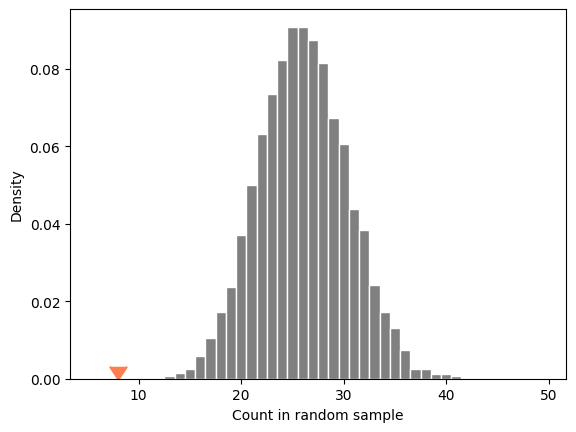

In [19]:
plt.hist(sim_counts, 
         bins=bins, 
         edgecolor="white", 
         color="grey", 
         density=True);
plt.xlabel("Count in random sample")
plt.ylabel("Density")
plt.scatter(8, 0, color="coral", s=150, marker=7);

+ The simulation also could have been done using `np.random.multinomial`.
+ This is an example of a 'vectorized' computation, and are usually faster than non-vectorized computations.

Text(0, 0.5, 'Density')

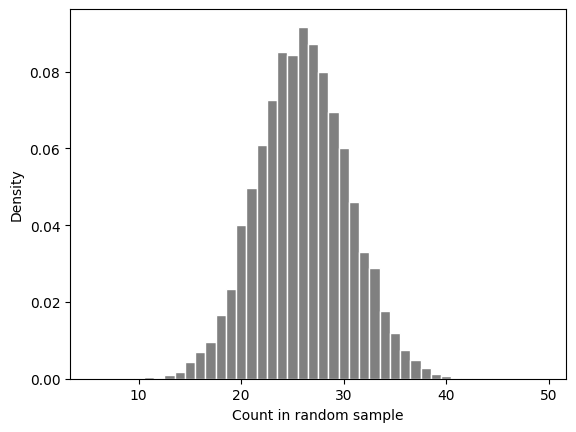

In [20]:
sample_size = 100

true_probabilities = [0.26, 0.74]

num_simulations = 10000

counts = np.random.multinomial(sample_size, 
                               true_probabilities, 
                               num_simulations)

# counts[:,0] # returns the first item of the individual arrays

black_counts_series = pd.Series(counts[:,0])
# pandas allows you to plot directly from a series
black_counts_series.plot.hist(
    bins=bins, 
    edgecolor="white", 
    color="grey", 
    density=True)
plt.xlabel("Count in random sample")
plt.ylabel("Density")

## Conclusion of the data analysis

- The histogram shows that if we select a panel of size 100 at random from the eligible population, we are very unlikely to get counts of Black panelists that are as low as the eight that were observed on the panel in the trial.

- This is evidence that the model of random selection of the jurors in the panel is not consistent with the data from the panel. While it is possible that the panel could have been generated by chance, our simulation demonstrates that it is hugely unlikely.

- Therefore the most *reasonable* conclusion is that the assumption of random selection is unjustified for this jury panel.

## Comparing two samples

### Comparing plant fertilizers

- A gardener wanted to discover whether a change in fertilizer mixture applied to their tomato plants would result in improved yield.

- She had 11 plants set out in a single row:
   + 5 were given standard fertilizer mixture A
   + 6 were given a supposedly improved mixture B

- The A's and B's were randomly applied to positions along the row to give the following data:

|                |  |   |   |   |   |   |   |   |   |   |   |
|----------------|---|---|---|---|---|---|---|---|---|---|---|
|Position in row | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11 |
|Fertilizer      | A | A | B | B | A | B |B  |B  | A | A | B  |
|Tomatoe yields (lbs) | 29.2 | 11.4 | 26.6 | 23.7 | 25.3 | 28.5 | 14.2 | 17.9 | 16.5 | 21.1 | 24.3 |

|                |  |   |   |   |   |   |   |   |   |   |   |
|----------------|---|---|---|---|---|---|---|---|---|---|---|
|Position in row | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11 |
|Fertilizer      | A | A | B | B | A | B |B  |B  | A | A | B  |
|Tomatoe yields (lbs) | 29.2 | 11.4 | 26.6 | 23.7 | 25.3 | 28.5 | 14.2 | 17.9 | 16.5 | 21.1 | 24.3 |


- The random arrangement was arrived at by taking 11 playing cards, 5 marked A, and 6 marked B.

- Thoroughly shuffling the cards once the gardener arrived at the arrangement above.

- To test for an improvement, the null hypothesis is: $\mu_A = \mu_B$ or $\mu_B-\mu_A=0$

Let's store the results in a DataFrame.

In [21]:
import pandas as pd

fertilizer = ["A", "A", "B", "B", "A", "B", "B", "B", "A", "A", "B"]

tomatoes = [29.2, 11.4, 26.6, 23.7, 25.3, 28.5, 14.2, 17.9, 16.5, 21.1, 24.3]
# this is a dictionary
data = {"fert": fertilizer, "tomatoes": tomatoes}
# this is a DataFrame
plant_df = pd.DataFrame(data)

print(plant_df)

   fert  tomatoes
0     A      29.2
1     A      11.4
2     B      26.6
3     B      23.7
4     A      25.3
5     B      28.5
6     B      14.2
7     B      17.9
8     A      16.5
9     A      21.1
10    B      24.3


We can use the DataFrame to compute the observed mean difference.

In [22]:
# mean of plants assigned fert A
mean_A_obs = plant_df.loc[plant_df["fert"] == "A", "tomatoes"].mean() # note the use of .loc[]

# mean of plants assigned fert B
mean_B_obs = plant_df.loc[plant_df["fert"] == "B", "tomatoes"].mean()

# mean difference
obs_diff =  mean_B_obs - mean_A_obs

print(f"The mean tomato yield using the standard fertilizer was {round(mean_A_obs, 3)} lbs "
      + f"while using the new fertlizer yielded {round(mean_B_obs, 3)} lbs on average. " 
      + f"The difference is {round(obs_diff, 3)} lbs.")

The mean tomato yield using the standard fertilizer was 20.7 lbs while using the new fertlizer yielded 22.533 lbs on average. The difference is 1.833 lbs.


- Since the assignment of fertilizers to plants is random it could have happened another way.

- If the null hypothesis is true, the difference we observed happened only by chance; i.e., only because we happened to randomly shuffle the cards in the particular order.

- We can use the `pandas` `sample` function with `frac` and `replace` parameters to simulate these other potential assignments of fertilizers to plants.

    + `frac=1` - specifies the fraction of rows to return (1 means return all the rows)
    + `replace=False` - specifies to sample without replacement

In [23]:
plant_df["fert"].sample(frac=1, replace=False)

7     B
2     B
6     B
4     A
8     A
3     B
5     B
9     A
1     A
10    B
0     A
Name: fert, dtype: object

- Notice that the index is out of order.

- We are going to want to have an ordered index later on.  

- To do this we can use the `pandas` function `reset_index(drop=True)`. 

- `drop=True` indicates that we don't want to keep the previous index. 

In [24]:
plant_df["fert"].sample(frac=1, replace=False).reset_index(drop=True)

0     B
1     A
2     B
3     B
4     B
5     A
6     A
7     A
8     A
9     B
10    B
Name: fert, dtype: object

## Steps for the hypothesis test

### 1. Hypotheses

Two claims:

1. There is no difference in the mean weight between fertilizers A and B.  This is called the null hypothesis.

2. There is a difference in the mean weight between fertilizers A and B.  This is called the alternative hypothesis.

### 2. Test statistic

The test statistic is a number, calculated from the data, that captures what we're interested in.

What would be a useful test statistic for this study?  1.833 (`obs_diff`)

### 3. Simulate what the null hypothesis predicts will happen

- If the null hypothesis is true then the weight of tomatoes for each plant will be the same regardless of how they are labeled. That means we can randomly shuffle the labels and the mean difference should be close to 0.

Assume that there is no difference in mean weight between A and B (i.e., the null hypothesis is true).  Now, consider the following **thought experiment (we don't actually do this, this is a model for the data)**:

- Imagine we have 5 playing cards labelled `A` and 6 cards labelled `B`.


- Shuffle the cards ...


- Assign the cards to the 11 plants then calculate the mean weight difference between `A` and `B`.  This is one simulated value of the test statistic. 


- Shuffle the cards again ...


- Assign the cards to the 11 plants then calculate the mean weight difference between `A` and `B`.  This is second simulated value of the test statistic. 


- Continue shuffling, assigning , and computing the mean difference.

## Simulating what the null hypothesis predicts

Let's assume the null hypothesis is true and simulate what the null hypothesis predicts.

### Step 1

Randomly shuffle the assignment of fertilizers to plants. 

In [25]:
fert_sim = plant_df["fert"].sample(frac=1, replace=False).reset_index(drop=True)
fert_sim

0     B
1     B
2     B
3     B
4     A
5     A
6     B
7     A
8     A
9     B
10    A
Name: fert, dtype: object

### Step 2

Compute the mean difference between fertilizers A and B.

In [26]:
mean_A = plant_df.loc[fert_sim == "A", "tomatoes"].mean()

mean_B = plant_df.loc[fert_sim == "B", "tomatoes"].mean()

sim_diff = mean_B - mean_A

sim_diff

-1.4666666666666615

### Step 3

Repeat Steps 1 and 2 a large number of times (e.g., 5000) to get the distribution of mean differences. 

In [27]:
simulated_diffs = []

for _ in range(5000):
    fert_sim = plant_df["fert"].sample(frac=1, replace=False).reset_index(drop=True)
    mean_A = plant_df.loc[fert_sim == "A", "tomatoes"].mean()
    mean_B = plant_df.loc[fert_sim == "B", "tomatoes"].mean()
    sim_diff = mean_B - mean_A
    simulated_diffs.append(sim_diff)
    

1.8333333333333357

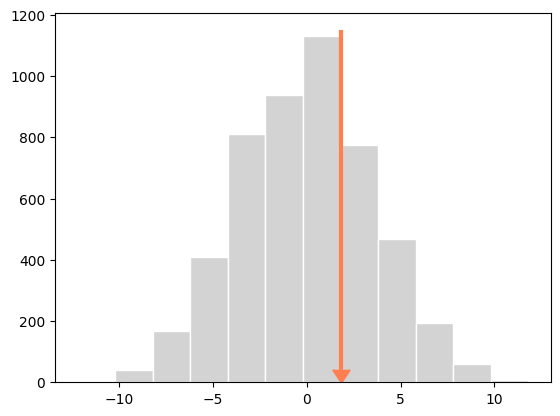

In [28]:
plt.hist(simulated_diffs, edgecolor="white", color="lightgrey", bins=np.arange(-12.2, 13.8, 2))
plt.vlines(x=obs_diff, ymin=10, ymax=1150, color="coral", linewidth=3) # a vertical line
plt.scatter(obs_diff, 0, color="coral", s=150, marker=7);              # an arrowhead
obs_diff

- The histogram above shows the randomization distribution with the observed difference as the black line.

- What proportion of the simulated differences are "as unusual as or more than" the observed mean difference of 1.833 assuming the null hypothesis of 0 difference?  This is known as the **p-value**.

The number of simulated differences as far or further away from 0 difference as the observed mean difference is: 3119
The p-value is: 0.6238


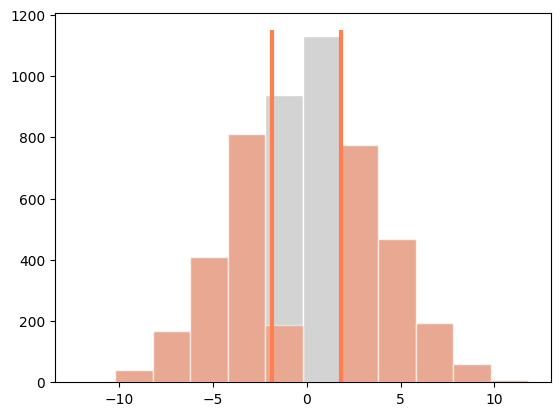

In [29]:
simulated_diffs_series = pd.Series(simulated_diffs)

plt.hist(simulated_diffs_series, edgecolor="white", color="lightgrey", bins=np.arange(-12.2, 13.8, 2));
plt.hist(simulated_diffs_series[abs(simulated_diffs_series) >= abs(obs_diff)], edgecolor="white", color="coral", alpha=.5, bins=np.arange(-12.2, 13.8, 2));
plt.vlines(x=obs_diff, ymin=0, ymax=1150, color="coral", linewidth=3)
plt.vlines(x=-obs_diff, ymin=0, ymax=1150, color="coral", linewidth=3);

right_extreme_count = (simulated_diffs_series >= obs_diff).sum()
left_extreme_count = (simulated_diffs_series <= -obs_diff).sum()


all_extreme = right_extreme_count + left_extreme_count

print("The number of simulated differences as far or further away from 0 difference as the observed mean difference is:", all_extreme)

pvalue = all_extreme / 5000

print("The p-value is:", pvalue)

### Step 4

Interpret the results.  

Assuming that there is no difference in the mean tomato plant weights between A and B, 62% of simulations resulted in the absolute mean difference between the two fertilizers as large as or larger than the observed mean difference of 1.833. 

Therefore, there is little reason to doubt the null hypothesis that fertilizers produce similar yields.

**Exercise**

Suppose that in a similar study of two fertilizers effect on yield of tomatoes a similar simulation of 5000 yielded that 10 simulated absolute differences were greater than the observed difference (of 1.833).  How would this change your interpretation of the results?

- Conclude that there is a difference
- If the difference is positive, fertilizer B is better.
- If the difference is negative, fertizlier B is worse.

**Try on your own exercise:**

Modify the simulation so that you compare the difference in medians instead of the difference in means.

The p-value is: 0.7142


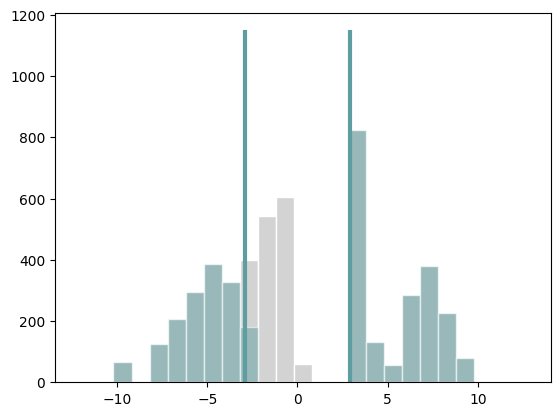

In [30]:
# hint: you can compute the observed difference as below:
med_A_obs = plant_df.loc[plant_df["fert"] == "A", "tomatoes"].median() 
med_B_obs = plant_df.loc[plant_df["fert"] == "B", "tomatoes"].median()

obs_diff = med_B_obs - med_A_obs

simulated_diffs = []

for _ in range(5000):
    fert_sim = plant_df["fert"].sample(frac=1, replace=False).reset_index(drop=True)
    med_A = plant_df.loc[fert_sim == "A", "tomatoes"].median()
    med_B = plant_df.loc[fert_sim == "B", "tomatoes"].median()
    sim_diff = med_B - med_A
    simulated_diffs.append(sim_diff)
    
simulated_diffs_series = pd.Series(simulated_diffs)

plt.hist(simulated_diffs_series, edgecolor="white", color="lightgrey", bins=np.arange(-12.2, 13.8, 1));
plt.hist(simulated_diffs_series[abs(simulated_diffs_series) >= abs(obs_diff)], edgecolor="white", color="CadetBlue", alpha=.5, bins=np.arange(-12.2, 13.8, 1));
plt.vlines(x=obs_diff, ymin=0, ymax=1150, color="CadetBlue", linewidth=3)
plt.vlines(x=-obs_diff, ymin=0, ymax=1150, color="CadetBlue", linewidth=3);

right_extreme_count = (simulated_diffs_series >= obs_diff).sum()
left_extreme_count = (simulated_diffs_series <= -obs_diff).sum()


all_extreme = right_extreme_count + left_extreme_count

pvalue = all_extreme / 5000

print("The p-value is:", pvalue)

What is the p-value for the case of Robert Swain?

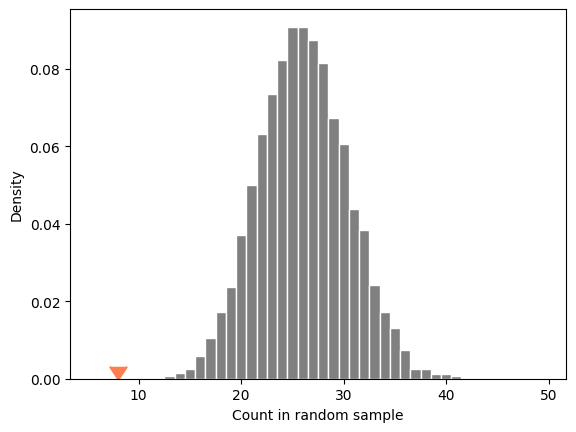

In [31]:
plt.hist(sim_counts, bins=bins, edgecolor="white", color="grey", density=True)
plt.xlabel("Count in random sample")
plt.ylabel("Density")
plt.scatter(8, 0, color="coral", s=150, marker=7);

+  The simulated data is based on the assumption that the panel was selected fairly --- the null hypothesis.
+  The observed data contained 8 black men out of 100 panel members.
+  How many of the simulated values were as extreme or more than 8?

## Are mammals are larger or smaller than birds?


We want to use the birds and mammals common in the IUCN and Amniote Data files. Let's read them in.

In [32]:
import pandas as pd
animal_iucn = pd.read_csv("animal_iucn.csv")
amniote_db = pd.read_csv("Amniote_Database_Aug_2015.csv")

In [33]:
print(animal_iucn.columns)
animal_iucn.shape

Index(['assessmentId', 'internalTaxonId', 'scientificName', 'kingdomName',
       'phylumName', 'orderName', 'className', 'familyName', 'genusName',
       'speciesName', 'infraType', 'infraName', 'infraAuthority', 'authority',
       'redlistCategory', 'redlistCriteria', 'criteriaVersion',
       'populationTrend', 'scopes'],
      dtype='object')


(83669, 19)

In [34]:
print(amniote_db.columns)
amniote_db.shape

Index(['class', 'order', 'family', 'genus', 'species', 'subspecies',
       'common_name', 'female_maturity_d', 'litter_or_clutch_size_n',
       'litters_or_clutches_per_y', 'adult_body_mass_g', 'maximum_longevity_y',
       'gestation_d', 'weaning_d', 'birth_or_hatching_weight_g',
       'weaning_weight_g', 'egg_mass_g', 'incubation_d', 'fledging_age_d',
       'longevity_y', 'male_maturity_d',
       'inter_litter_or_interbirth_interval_y', 'female_body_mass_g',
       'male_body_mass_g', 'no_sex_body_mass_g', 'egg_width_mm',
       'egg_length_mm', 'fledging_mass_g', 'adult_svl_cm', 'male_svl_cm',
       'female_svl_cm', 'birth_or_hatching_svl_cm',
       'female_svl_at_maturity_cm', 'female_body_mass_at_maturity_g',
       'no_sex_svl_cm', 'no_sex_maturity_d'],
      dtype='object')


(21322, 36)

## Merge IUCN and Amniote DataFrames

- We want to merge `Amniote_db` and `animal_iucn`
- What column can we merge on?
- The `'scientificName'` column in `animal_iucn` can be found in `Amniote_db` if we concatenate `'genus'`, `' '`, and `'species'`.
- `+` concatenates (links) strings together in python. 

In [35]:
# an example of of concatenation

string1 = "IUCN"

string3 = "is an interesting"

string4 = "dataset."

space = " "

string1 + space + string3 + space + string4

'IUCN is an interesting dataset.'

Let's create a column called `"sciname"` in `Amniote_db`.

In [36]:
sciname = amniote_db["genus"] + " " + amniote_db["species"]
amniote_db["sciname"] = sciname

In [37]:
amniote_db[["genus", "species", "sciname"]]

,genus,species,sciname
0,Accipiter,albogularis,Accipiter albogularis
1,Accipiter,badius,Accipiter badius
2,Accipiter,bicolor,Accipiter bicolor
3,Accipiter,brachyurus,Accipiter brachyurus
4,Accipiter,brevipes,Accipiter brevipes
...,...,...,...
21317,Nilssonia,nigricans,Nilssonia nigricans
21318,Palea,steindachneri,Palea steindachneri
21319,Pelochelys,bibroni,Pelochelys bibroni
21320,Pelodiscus,sinensis,Pelodiscus sinensis


### `merge`

Use the `pandas` `merge` function to join `Amniote_iucn` and `animal_iucn`.

In [38]:
amniote_iucn = amniote_db.merge(animal_iucn, left_on="sciname", right_on="scientificName")
amniote_iucn[["scientificName", "sciname"]].head()

,scientificName,sciname
0,Accipiter albogularis,Accipiter albogularis
1,Accipiter badius,Accipiter badius
2,Accipiter bicolor,Accipiter bicolor
3,Accipiter brachyurus,Accipiter brachyurus
4,Accipiter brevipes,Accipiter brevipes


- We want to compare body mass between `"Aves"` and `"Mammalia"`. 

- So, let's create a DataFrame with only these two classes.

In [39]:
aves = amniote_iucn["class"] == "Aves"
mam = amniote_iucn["class"] == "Mammalia"

# select aves or mammals
amniote_iucn_aves_mam = amniote_iucn[aves | mam]

In [40]:
amniote_iucn_aves_mam["class"].value_counts()

class
Aves        8644
Mammalia    4490
Name: count, dtype: int64

The observed weight distributions in the two groups is:

In [41]:
amniote_iucn_aves_mam.groupby("class")["adult_body_mass_g"].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Aves,8644.0,275.566039,2.079283e+03,-999.0,14.00,35.0125,131.56250,109250.0
Mammalia,4490.0,132933.163932,2.779909e+06,-999.0,15.13,60.9475,692.19125,149000000.0


Extract the group means.

In [42]:
mean_table = amniote_iucn_aves_mam.groupby("class")["adult_body_mass_g"].mean()
mean_table

class
Aves           275.566039
Mammalia    132933.163932
Name: adult_body_mass_g, dtype: float64

Compute the observed difference.

In [43]:
observed_mean_difference = mean_table.iloc[1] - mean_table.iloc[0]
observed_mean_difference 

132657.59789303897

- So, mammals are on average 132,658 grams larger than aves.

- Could this difference be due to the sample of mammmals and aves in our data?  In other words, is this due to chance? 

## Steps for the hypothesis test

### 1. Hypotheses

Two claims:

1. There is no difference in the mean body weight between mammals and Aves. This is the null hypothesis.

2. There is a difference in the mean body weight between mammals and Aves. This is called the alternative hypothesis.

### 2. Test statistic

The test statistic is a number, calculated from the data, that captures what we're interested in.

What would be a useful test statistic for this study?  `observed_mean_difference`

### 3. Simulate what the null hypothesis predicts will happen

- If the null hypothesis is true then the mean weight in mammals should be the same as aves.  This implies that we can randomly shuffle the labels and the mean difference should be close to 0.


- Imagine we have 8644 playing cards labelled `Aves` and 4490 cards labelled `Mammalia`.


- Shuffle the cards ...


- Assign the cards to the 13,134 animals then calculate the mean difference between `Aves` and `Mammalia`.  This is one simulated value of the test statistic. 


- Shuffle the cards again ...


- Assign the cards to the 13,134 animals then calculate the mean difference between `Aves` and `Mammalia`.  This is one simulated value of the test statistic. 


- Continue shuffling, assigning to neigbourhoods, and computing the mean difference.

## Simulating what the null hypothesis predicts

### Step 1

Randomly shuffle the assignment of `Aves` and `Mammalia` to animals

In [44]:
avemam_sim = amniote_iucn_aves_mam["class"].sample(frac=1, replace=False).reset_index(drop=True)
avemam_sim

0            Aves
1            Aves
2            Aves
3            Aves
4            Aves
           ...   
13129        Aves
13130        Aves
13131    Mammalia
13132        Aves
13133    Mammalia
Name: class, Length: 13134, dtype: object

## Step 2

Calculate the mean difference for the shuffled labels.

In [45]:
ave_mean_sim = amniote_iucn_aves_mam.loc[avemam_sim == "Aves", "adult_body_mass_g"].mean()

mam_mean_sim = amniote_iucn_aves_mam.loc[avemam_sim == "Mammalia", "adult_body_mass_g"].mean()

sim_diff = mam_mean_sim - ave_mean_sim

sim_diff

29752.335601462793

### Step 3

Repeat Steps 1 and 2 a large number of times (e.g., 10000) to get the distribution of mean differences. 

In [46]:
simulated_diffs = []

for _ in range(10000):
    avemam_sim = amniote_iucn_aves_mam["class"].sample(frac=1, replace=False).reset_index(drop=True) # shuffling bird + mammal labels
    ave_mean_sim = amniote_iucn_aves_mam.loc[avemam_sim == "Aves", "adult_body_mass_g"].mean() # calculate mean bird weight
    mam_mean_sim = amniote_iucn_aves_mam.loc[avemam_sim == "Mammalia", "adult_body_mass_g"].mean()  # mean mammal weight
    sim_diff = mam_mean_sim - ave_mean_sim # difference in simulated mammal and bird weight
    simulated_diffs.append(sim_diff)
    

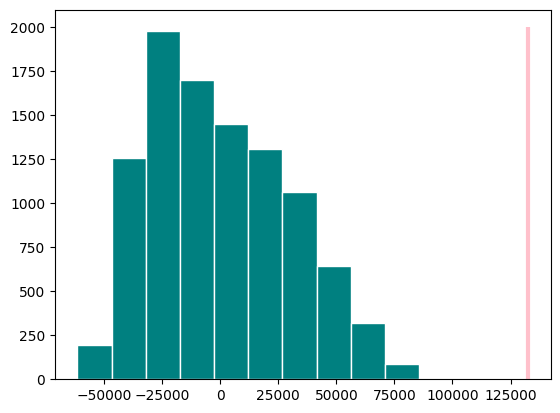

In [47]:
import matplotlib.pyplot as plt

plt.hist(simulated_diffs, edgecolor="white", color="teal")
plt.vlines(x=observed_mean_difference , ymin=0, ymax=2000, color="pink", linewidth=3);

- The histogram above shows the randomization distribution with the observed difference as the pink line.

- What proportion of the simulated differences are larger than the observed mean difference of 35829.4?  This is known as the **p-value**.

In [48]:
simulated_diffs_series = pd.Series(simulated_diffs)

right_extreme_count = (simulated_diffs_series >= observed_mean_difference).sum()
left_extreme_count = (simulated_diffs_series <= -observed_mean_difference).sum()


all_extreme = right_extreme_count + left_extreme_count


print("The number of simulated differences greater than the observed difference is:", all_extreme)

pvalue = all_extreme / 10000

print("The p-value is:", pvalue)

The number of simulated differences greater than the observed difference is: 0
The p-value is: 0.0


### Step 4

Interpret the results.  

Assuming that there is no difference in the mean weights between Aves and Mammalia, 0% of simulations had as large or larger value than the observed mean difference of 35829.4.  Therefore, there is reason to doubt the null hypothesis that one group is larger than the other.

_Does the biological class **cause** a higher weight in Mammalia?_

## Causality

Imagine...

<div class="grid-row">
<div class="col-sm-7">
<ul>
<li>You have a headache.</li>
</ul>
</div>
<div class="col-sm-5"><img src="headache.svg" />
</div>



<div class="grid-row">
<div class="col-sm-7">
<ul>
<li>You take an Aspirin at 10:00 to relieve your pain.</li>
<li>Your pain goes away after <strong>30 minutes</strong>.</li>
</ul>
</div>
<div class="col-sm-5"><img src="pill.svg" />
</div>



<div class="grid-row">
<div class="col-sm-7">
<ul>
<li>Now, you go back in time to 10:00 and you don't take an Aspirin.</li>
<li>Your pain goes away after 48 minutes.</li>
</ul>
</div>
<div class="col-sm-5"><img src="clock.svg" />
</div>



The **causal effect** of taking an Aspirin is 18 minutes (48 minutes - 30 minutes).


![](causal.jpeg)

## Potential outcomes and randomized control trials

- Establishing causality involves comparing these **potential outcomes**.  

- The problem is that we can never observe both taking an Aspirin and not taking as Aspirin (in the same person at the same time under the same conditions).

- A close approximation to comparing potential outcomes is to compare two groups of people that are similar on average (age, sex, income, etc.) except one group is allowed to take Aspirin after a headache and the other group takes a fake Aspirin (sugar pill/placebo) after a headache.  This is an example of a randomized control trial.

- Then the mean difference between time to pain relief should be due to Aspirin and not other factors related to why people may or may not take an Aspirin.  



## Review

- The tomato plant example is an example of a test where the conclusion is indeterminate. The observed difference between groups is plausible under the model that the fertilizer had no effect on the weight of tomatoes. 

- If the null hypothesis is true then the two results from each particular pot will be exchangeable.  But, this hypothesis could be false if, say, some of the plants were diseased.

- The example investigating the weight difference between two biological classes provided strong evidence for difference in weights; but the hypothesis analysis doesn't prove a cause-and-effect relationship.

- It would be more reasonable to believe another factor/attribute not studied in the analysis _caused_ the difference in weights AND labelling of the biological classes.